# Ordinary Differential Equation Solver

Ordinary differential equations are seen in many different fields in Physics. Let's start with an easy example of it. 
## Example 1:
A simple circuit that consist of a DC voltage source, a capacitor and a resistor.

If we apply the Kirchoff's rule to this circuit we obtain the following equation: 

$$
V - \frac{q}{C} - IR = 0  
$$  

where V is the voltage of DC voltage source,
q is the charge of capacitor,
C is the capacitance,
I is current
and R is the resistance of ressistor.

If we subsitute $ I = \frac{dq}{dt} $ to the equation, it becomes:
$$
V - \frac{q}{C} - \frac{dq}{dt} R = 0  
$$

If we leave $\frac{dq}{dt}$ alone equation becomes:
$$
\frac{dq}{dt} = \frac{V}{R} - \frac{q}{RC}
$$

It is in the format we are looking for! Now we can use our code.

In [1]:
import ode_solver
import numpy as np
import matplotlib.pyplot as plt

Let's solve it for values $ V= 3V , R = 100 \Omega , \, C = 100 \mu F $

In [2]:
v, r, c = 3, 1000, 100e-6
def capacitor(t,q):
    return v/r - q/(r*c)

If we want to see the charging of capacitor we should use the boundary conditions $Q(t_0 = 0) = 0$ thus:

In [3]:
b = [0,0]

Let's check the first 20 seconds of the charge against time. We should choose a small step size to have accurate results

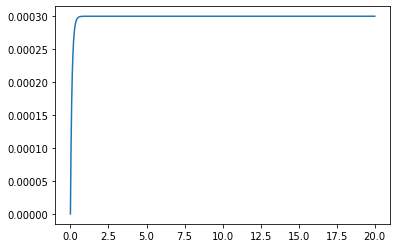

In [4]:
t_last, step = 20, 1e-3
cap = ode_solver.Solver(capacitor, b, t_last, step)
plt.plot(*cap.classic4th())
plt.show()

We can see capacitor is fully charged at about first second. To see the charging curve better let's zoom in:

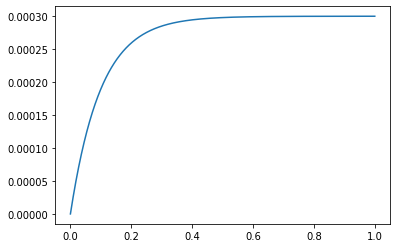

In [5]:
t_last, step = 1, 1e-3
cap = ode_solver.Solver(capacitor, b, t_last, step)
plt.plot(*cap.classic4th())
plt.show()

Great an exponential curve as we expected. Moreover $Q_{max} = V\cdot C = 3\cdot 100\cdot10^{-6} = 3\cdot10^{-4} $ may also be seen on graph.

Lastly let's make the graph look better:

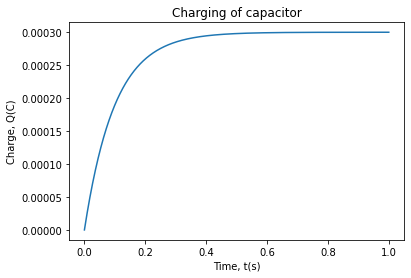

In [6]:
plt.plot(*cap.classic4th())
plt.xlabel("Time, t(s)")
plt.ylabel("Charge, Q(C)")
plt.title('Charging of capacitor')
plt.show()

Now we know the charge of fully charged capacitor so we can look for the discharging of it when DC source is unplugged. This time let's use another Runge-Kutta method from our code. This time first value of $Q$ should be the charge of fully charged capacitor $Q_{max}$ and from Kirchoff's rule function can be found easily:  

$$
\frac{dq}{dt} = - \frac{q}{RC}
$$

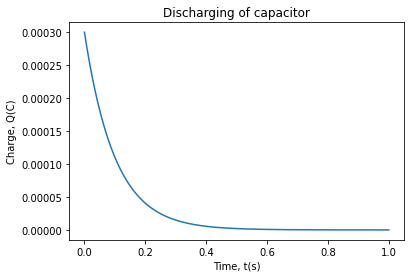

In [7]:
def discharge(t,q):
    return - q/(r*c)
b2 = [0,3e-4]
cap = ode_solver.Solver(discharge, b2, 1, 1e-3)
plt.plot(*cap.ralston())
plt.xlabel("Time, t(s)")
plt.ylabel("Charge, Q(C)")
plt.title('Discharging of capacitor')
plt.show()

Again results are as expected! Let's finally compare the results with the analytical solution which is:
$$
Q(t) = CVe^{-\frac{t}{RC}}
$$

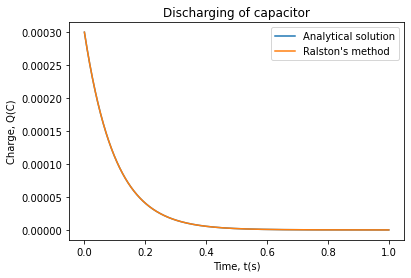

In [8]:
import numpy as np
t_analytic = np.linspace(0, 1, 2000)
q_analytic = c * v *  np.exp((-1 * t_analytic)/(r*c))
plt.plot(t_analytic,q_analytic, label='Analytical solution')
plt.plot(*cap.ralston(), label='Ralston\'s method')
plt.xlabel("Time, t(s)")
plt.ylabel("Charge, Q(C)")
plt.title('Discharging of capacitor')
plt.legend()
plt.show()

They perfectly fit. However if we choose a small step size they wouldn't fit that well:

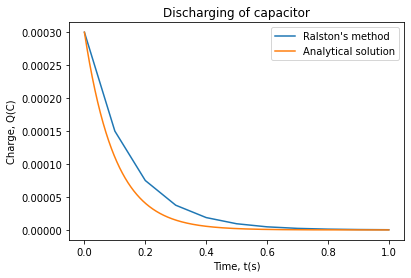

In [9]:
cap = ode_solver.Solver(discharge, b2, 1, .1)
plt.plot(*cap.ralston(), label='Ralston\'s method')
plt.plot(t_analytic,q_analytic, label='Analytical solution')
plt.xlabel("Time, t(s)")
plt.ylabel("Charge, Q(C)")
plt.title('Discharging of capacitor')
plt.legend()
plt.show()

So step size should be chosen small enough to get a good result!